Sessão 10 - Prática em Python
Limpeza e Tratamento de Dados

Exercício
Tratar os dados 'tempo.csv'. Domínios:
- Aparência: sol, nublado, chuva
- Temperatura: -130 a 130 F
- Umidade: 0 a 100
- Jogar: sim/nao

Tratar valores NAs

In [1]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sb
import statistics as st

In [6]:
# Importando os dados
dataset = pd.read_csv("tempo.csv", sep = ";")

# Vendo os dados
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [5]:
# Tamanho dos dados
dataset.shape

(14, 5)

In [7]:
# Explorar colunas categóricas
# Aparência
categorico_1 = dataset.groupby(['Aparencia']).size()
categorico_1

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

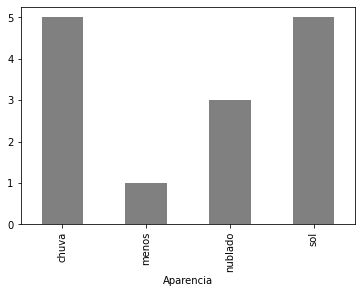

In [10]:
# Plotando Aparência
categorico_1.plot.bar(color = 'grey')

In [9]:
# Vento
categorico_2 = dataset.groupby(['Vento']).size()
categorico_2

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

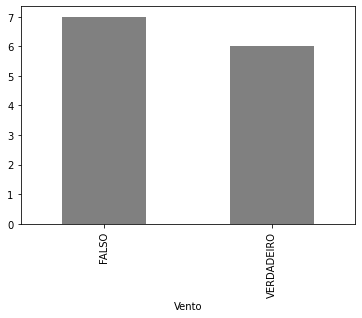

In [11]:
# Plotando Vento
categorico_2.plot.bar(color = 'grey')

In [12]:
# Jogar
categorico_3 = dataset.groupby(['Jogar']).size()
categorico_3

Jogar
nao    5
sim    9
dtype: int64

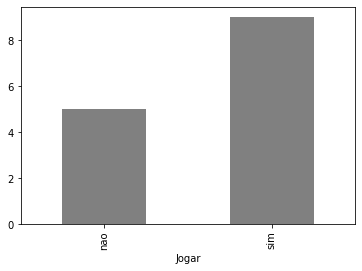

In [13]:
# Plotando Jogar
categorico_3.plot.bar(color = 'grey')

In [14]:
# Explorando colunas numéricas
# Temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

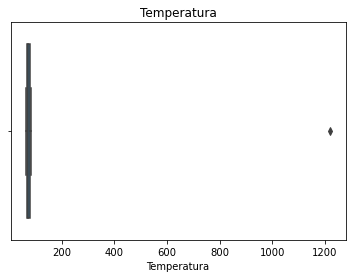

In [16]:
sb.boxplot(dataset['Temperatura']).set_title("Temperatura")

Text(0.5, 1.0, 'Temperatura')

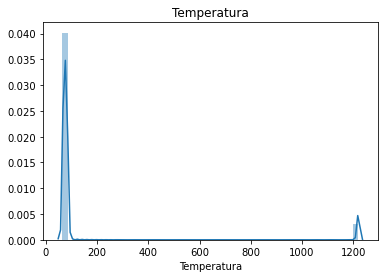

In [19]:
sb.distplot(dataset['Temperatura']).set_title("Temperatura")

In [20]:
# Umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

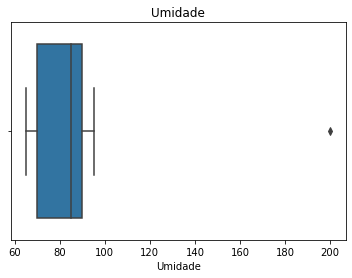

In [21]:
sb.boxplot(dataset['Umidade']).set_title("Umidade")

Text(0.5, 1.0, 'Umidade')

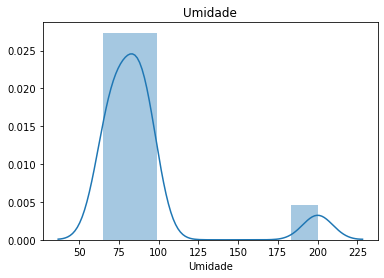

In [22]:
sb.distplot(dataset['Umidade']).set_title("Umidade")

In [25]:
# Contando os valores NAs
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [30]:
# Tratando a coluna Aparência
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = "chuva"
check = dataset.groupby(['Aparencia']).size()
check

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

In [33]:
# Tratando a coluna Temperatura
# Encontrando a mediana
mediana_temp = st.median(dataset['Temperatura'])
mediana_temp

# Substituindo valores fora do domínio pela mediana
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana_temp

# Checando
dataset['Temperatura'].describe()

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

In [36]:
# Tratando a coluna Umidade
# Encontrando a mediana
mediana_umid = st.median(dataset['Umidade'])
mediana_umid

# Substituindo os NAs e valores fora do domínio pela mediana
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = mediana_umid
dataset['Umidade'].fillna(mediana_umid, inplace = True)

# Visualizando
dataset['Umidade'].describe()

count    14.000000
mean     81.285714
std       9.585073
min      65.000000
25%      71.250000
50%      85.250000
75%      89.000000
max      95.000000
Name: Umidade, dtype: float64

In [38]:
# Tratando a coluna Vento
# Substituindo os valores NAs pela moda (FALSO)
dataset['Vento'].fillna("FALSO", inplace = True)

# Checando
check = dataset.groupby(['Vento']).size()
check

Vento
FALSO         8
VERDADEIRO    6
dtype: int64

In [39]:
# Checando NAs
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [40]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim


In [41]:
dataset.shape

(14, 5)